Download Dataset


In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-08-29 12:14:07--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.72.44.156, 2600:1417:3f:1291::317f, 2600:1417:3f:1289::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.72.44.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   276MB/s    in 2.8s    

2022-08-29 12:14:10 (276 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



Unzip the Dataset


In [2]:
!unzip kagglecatsanddogs_5340.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  inflating: PetImages/Dog/5523.jpg  
  i

Import Modules


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

Create Dataframe for Input and Output


In [4]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Dog/7927.jpg 1


Create Dataframe for Input and Output


In [5]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0   PetImages/Dog/4496.jpg      1
1   PetImages/Cat/9975.jpg      0
2   PetImages/Dog/6008.jpg      1
3   PetImages/Dog/1720.jpg      1
4  PetImages/Cat/10908.jpg      0

In [6]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [7]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Dog/Thumbs.db',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Dog/11702.jpg',
 'PetImages/Cat/666.jpg']

In [8]:
# delete db files
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

Resizing

In [9]:
from PIL import Image
import os, sys

path = "PetImages"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((200,200), Image.ANTIALIAS)
            imResize.save(f + ' resized.jpg', 'JPEG', quality=90)

resize()

**Normalization**

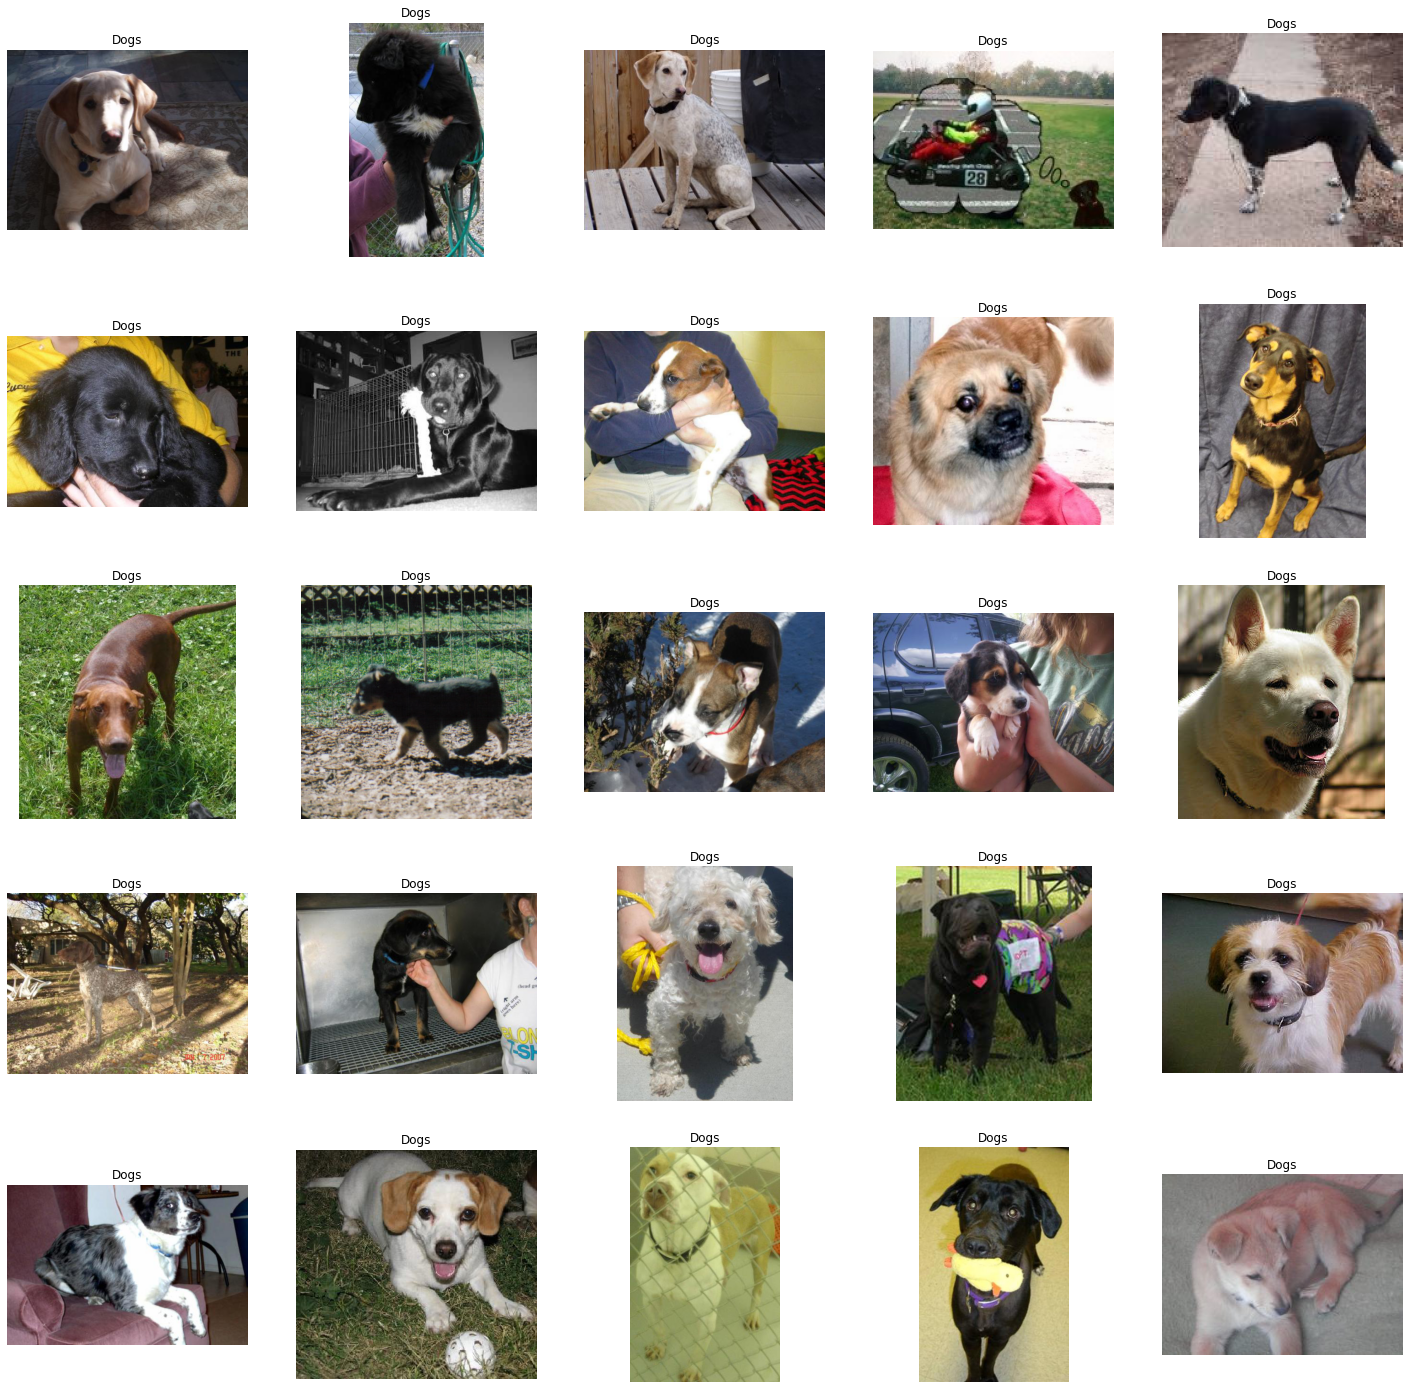

In [10]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

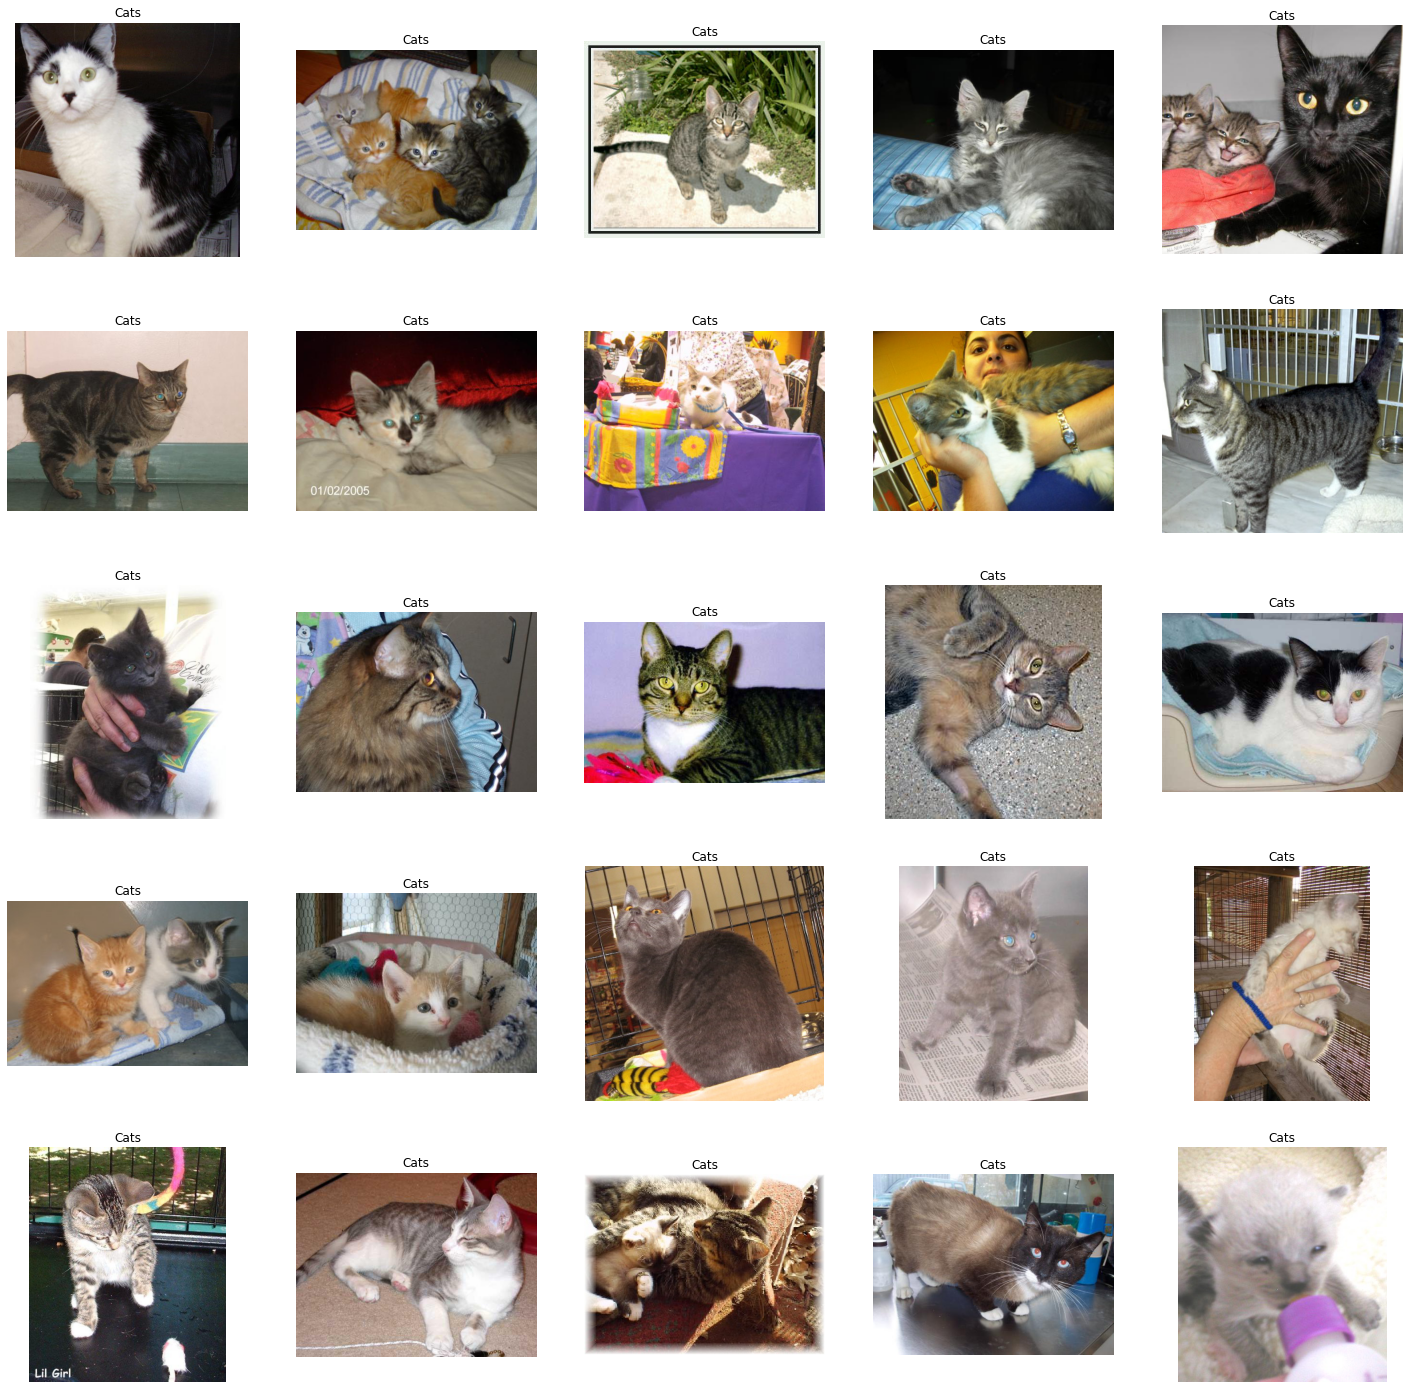

In [11]:
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

to display grid of images


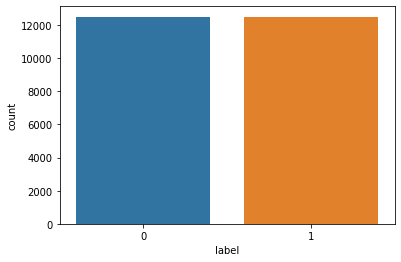

In [12]:
import seaborn as sns
sns.countplot(df['label'])

In [13]:
df['label'] = df['label'].astype('str')

In [14]:
df.head()

images label
0   PetImages/Dog/4496.jpg     1
1   PetImages/Cat/9975.jpg     0
2   PetImages/Dog/6008.jpg     1
3   PetImages/Dog/1720.jpg     1
4  PetImages/Cat/10908.jpg     0

In [15]:
df

images label
0       PetImages/Dog/4496.jpg     1
1       PetImages/Cat/9975.jpg     0
2       PetImages/Dog/6008.jpg     1
3       PetImages/Dog/1720.jpg     1
4      PetImages/Cat/10908.jpg     0
...                        ...   ...
24997   PetImages/Cat/1157.jpg     0
24998   PetImages/Dog/4756.jpg     1
24999   PetImages/Dog/3978.jpg     1
25000  PetImages/Cat/11271.jpg     0
25001  PetImages/Cat/10386.jpg     0

[24998 rows x 2 columns]

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [17]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


Model Creation

In [18]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import tensorflow as tf

In [19]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(128,128,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

94781440/94765736 [==============================] - 0s 0us/step


In [20]:
resnet_model.add(Flatten())
resnet_model.add(Dense(1, activation='sigmoid'))

In [21]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [24]:
resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history = resnet_model.fit(train_iterator, validation_data=val_iterator, epochs=10)

Epoch 1/10
40/40 [==============================] - 152s 3s/step - loss: 0.7050 - accuracy: 0.5192 - val_loss: 0.6759 - val_accuracy: 0.6144
Epoch 2/10
40/40 [==============================] - 132s 3s/step - loss: 0.6770 - accuracy: 0.5926 - val_loss: 0.6637 - val_accuracy: 0.6306
Epoch 3/10
40/40 [==============================] - 131s 3s/step - loss: 0.6729 - accuracy: 0.5873 - val_loss: 0.6546 - val_accuracy: 0.6228
Epoch 4/10
40/40 [==============================] - 131s 3s/step - loss: 0.6651 - accuracy: 0.6043 - val_loss: 0.6475 - val_accuracy: 0.6412
Epoch 5/10
40/40 [==============================] - 130s 3s/step - loss: 0.6615 - accuracy: 0.6078 - val_loss: 0.6445 - val_accuracy: 0.6290
Epoch 6/10
40/40 [==============================] - 131s 3s/step - loss: 0.6561 - accuracy: 0.6166 - val_loss: 0.6390 - val_accuracy: 0.6502
Epoch 7/10
40/40 [==============================] - 131s 3s/step - loss: 0.6509 - accuracy: 0.6295 - val_loss: 0.6334 - val_accuracy: 0.6520
Epoch 8/10
40

Visualization of Results

In [26]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

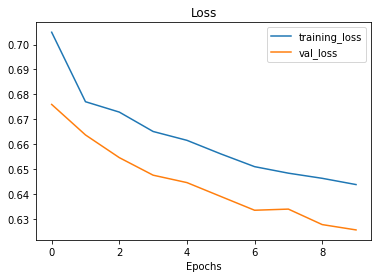

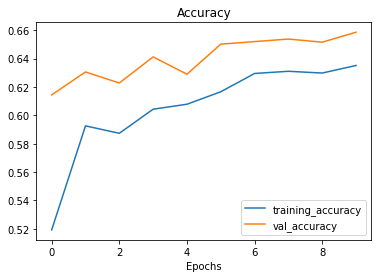

In [27]:
# Check out the loss curves of model
plot_loss_curves(history)